# worksheet week 3 Solutions

Worksheet on Pandas and Visualization using the mpg dataset. Load the mgp dataset and answer the following questions.

You can load the dataset using the following code:

```python
import seaborn as sns
df = sns.load_dataset('mpg')
```

or you can download the dataset from [here](https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv) and load it using the following code:

```python
import pandas as pd
df = pd.read_csv('mpg.csv')
```



Q: Describe the dataset. What is this dataset about? How many observations does it have? How many features?


In [16]:
import seaborn as sns
df = sns.load_dataset('mpg')

df.info()

# This is dataset of cars and some of their attributes, such as miles per gallon, cylinders, horsepower, weight, etc.
# We can see that there are 398 entries. For each brand name, we have the 8 attributes mentioned above.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Q: Is there missing data in the dataset? What's the plan to handle the missing data and why?

In [17]:
df[df.isna().any(axis=1)]
# some hourse power values are missing
# Some reasonable options are:
# (1) We can drop these rows because only a small fraction 6/398 = 1.5% of the data is missing
# (2) Since we are not running algorithms that require the data, we can keep them for now


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


Q: Create a new column `weight_kg` that converts weight from pounds to kilograms (1 pound = 0.453592 kg). Display the first few rows of the dataset after adding this new column.

In [18]:
df['weight_kg'] = df['weight'] * 0.453592

Q: How to visualize the distribution of the `mpg` of different `origin`?

<AxesSubplot:xlabel='mpg', ylabel='Count'>

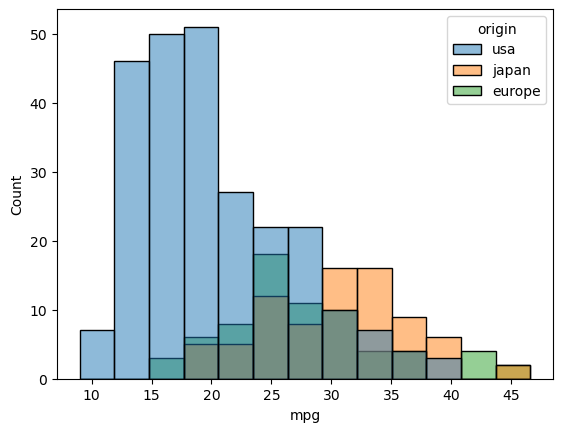

In [19]:
sns.histplot(df, x='mpg',hue='origin')

Q: How to visualize different percentiles of `mpg` for different `origin`?

<AxesSubplot:xlabel='origin', ylabel='mpg'>

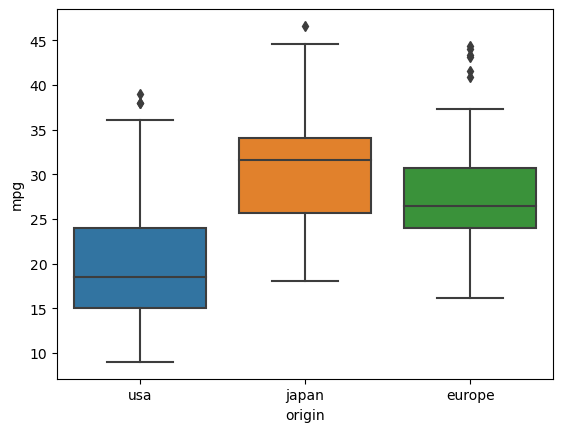

In [20]:
sns.boxplot(data=df, x='origin', y='mpg')

Q: Calculate and display the mean and standard deviation of the `mpg` and `horsepower` for each country.

In [21]:
df.groupby('origin')[['mpg','horsepower']].mean()


,mpg,horsepower
origin,,
europe,27.891429,80.558824
japan,30.450633,79.835443
usa,20.083534,119.048980


In [22]:
df.groupby('origin')[['mpg','horsepower']].var()

,mpg,horsepower
origin,,
europe,45.211230,406.339772
japan,37.088685,317.523856
usa,40.997026,1591.833657


Q: Compute the correlation matrix for mpg, weight, horsepower, and acceleration.

Then, create a heatmap to visualize these correlations. Which two features have the strongest correlation? Is there explanation for this correlation?

<AxesSubplot:>

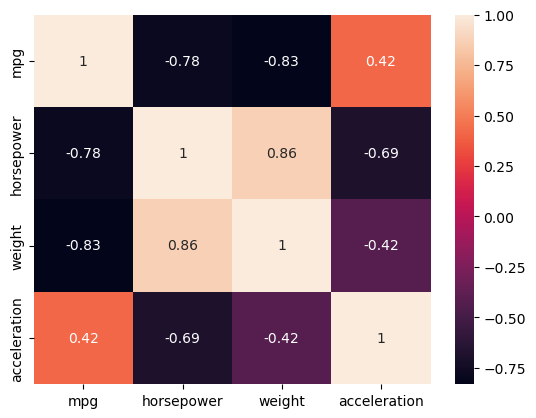

In [23]:
cor_matrix = df[['mpg','horsepower','weight','acceleration']].corr()

sns.heatmap(cor_matrix, annot=True)

# weight and mpg are strongly negatively correlated.
# the heavier the car, more energy it needs to move per mile, hence lower mpg.


Q: Create a pair plot of `mpg`, `displacement`, `horsepower`, and `weight`, colored by the `origin` of the cars. How do these variables interact with each other, and does car origin seem to influence these interactions?

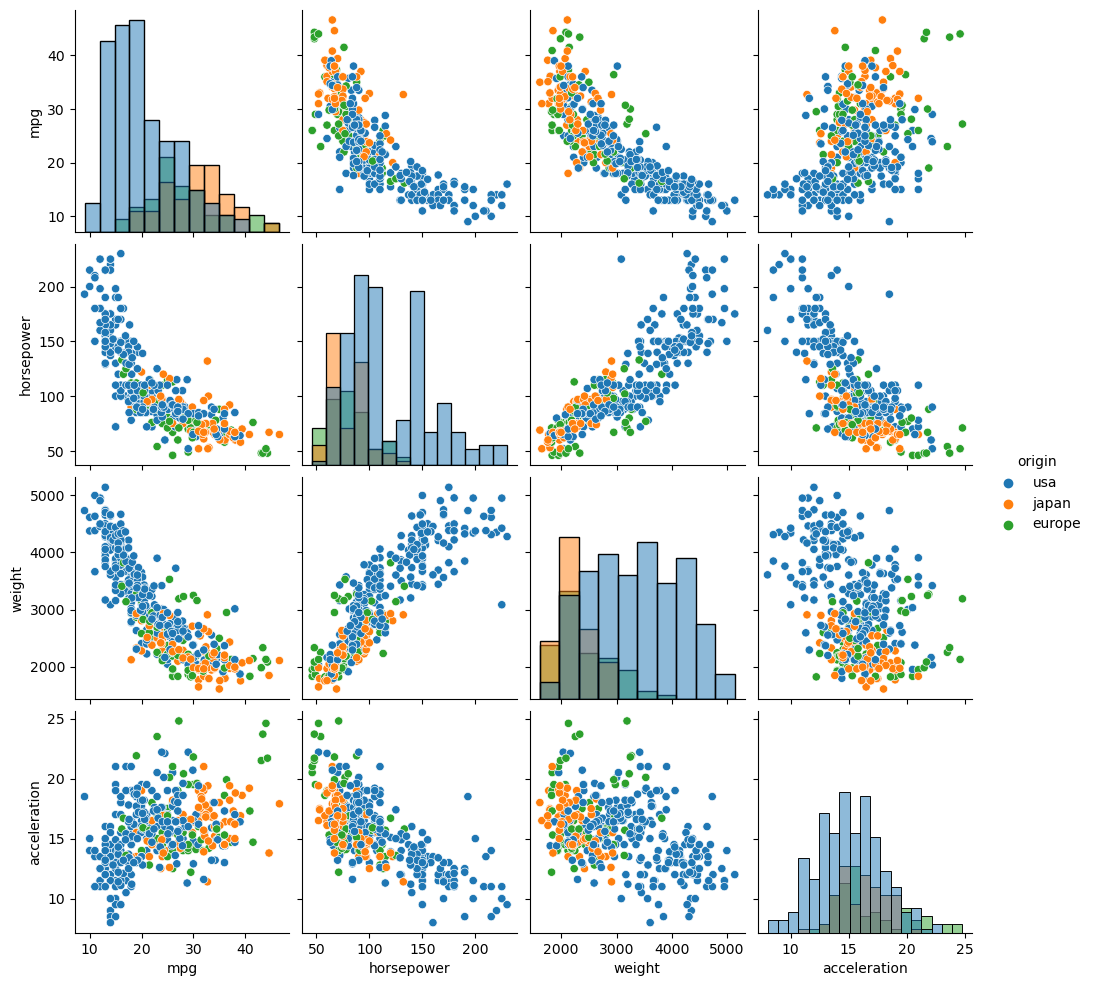

In [24]:
sns.pairplot(df[['mpg','horsepower','weight','acceleration','origin']]
             , diag_kind="hist", hue = 'origin')

Q Assuming the dataset includes a `model_year`, plot the trend of average `mpg` over the years. What trend do you observe in fuel efficiency over the years?

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

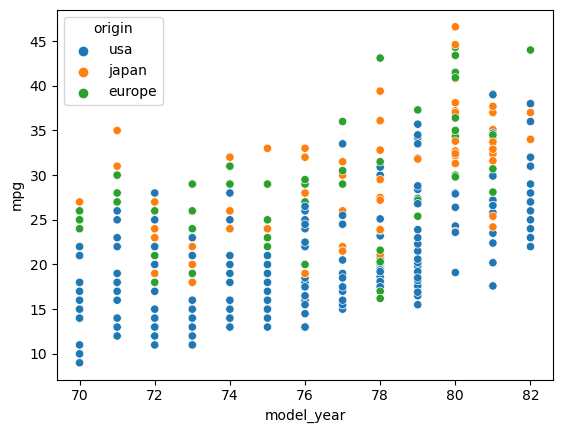

In [25]:
sns.scatterplot(data=df, x='model_year', y='mpg', hue='origin')

# the cars are getting more fuel efficient over time

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

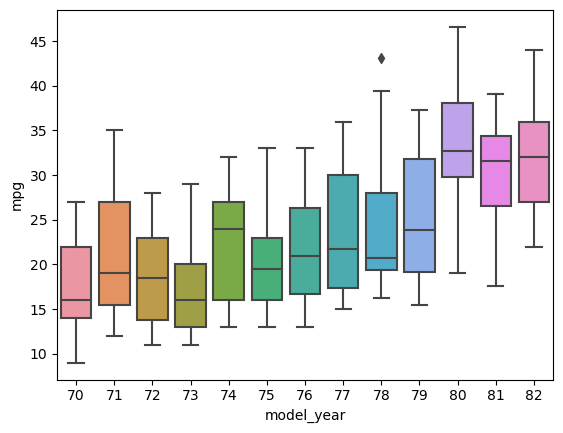

In [26]:
sns.boxplot(data=df, x='model_year', y='mpg')

Q Suppose someone says "US cars are less fuel efficient than European and Japanese cars". Use the data, think of arguments that support and oppose this statement.

Support: US cars have lower average mpg than european and japanese cars

Oppose: (1) Maybe this is because the data set have too many "old cars" from US, which tends to have lower mpg due to technology.
(2) These are just available models, not consumer choices. Maybe higher mpg car are actually more popular in the US, so we need more data. etc.

<AxesSubplot:xlabel='model_year', ylabel='count'>

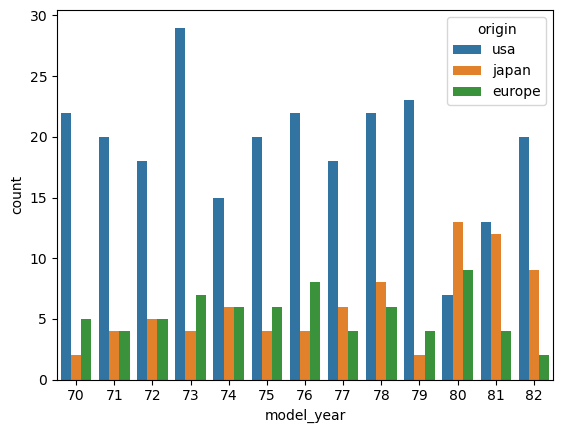

In [30]:
# visualize bar of model_year, color by origin
# It seems in this dataset, japan cars are "newer" than the other two origins, leading to higher mpg.
sns.countplot(data=df, x='model_year', hue='origin')

<AxesSubplot:xlabel='origin', ylabel='model_year'>

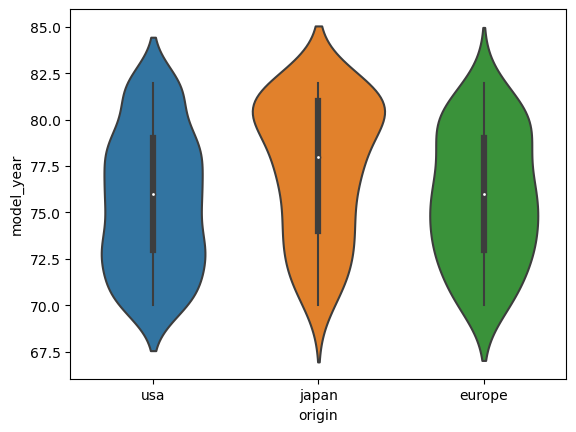

In [34]:
# another way to visualize
# It seems in this dataset, japan cars are "newer" than the other two origins, leading to higher mpg.
sns.violinplot(data=df, x='origin', y='model_year')

# A larger proportion of Japan cars are around 80-82 model year, while US cars are around 72-77 model year.